<a href="https://colab.research.google.com/github/gonzo120/Python/blob/main/Ejercicio_COINK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Una de las labores del equipo de Data en esta empresa es la de definir métricas para evaluar
el desempeño de la compañía. Para ello usará una base de depósitos en Oinks (depositos_oink.csv). Los Oinks
son máquinas en los que la gente puede depositar sus ahorros. Con ella debe construir una
métrica que evalúe qué tan buenos (bajo su propio criterio) son los usuarios de Coink y
calificar a los usuarios contenidos en la muestra. Cualquier gráfica para aclarar su métrica es
bienvenida (use la herramienta de visualización que mejor crea conveniente).

Ejercicio realizado por **NELSON GONZALEZ**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Leemos el dataframe

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/depositos_oinks.csv')
df

,Unnamed: 0,user_id,operation_value,operation_date,maplocation_name,user_createddate
0,0,0e52d550-ae23-407a-9b1f-6e5fb1f066ab,273850.0,2022-01-14 13:07:56,CC Plaza de las Américas - Plaza Mariposa,2022-01-09 19:23:18.332689
1,1,975ed41e-d891-4c23-aeba-06363019d8e3,900.0,2022-02-06 13:11:25,CC Plaza de las Américas - Plaza Mariposa,2022-01-10 15:19:29.419075
2,2,f9043545-dfc2-402f-a8c7-0a61f21cb719,1800.0,2022-02-23 14:01:56,Universidad de los Andes - ML Piso 5,2021-08-25 12:44:48.524941
3,3,979ca8ad-9600-4a1f-81e9-e70c2f55cdc5,6500.0,2021-12-16 12:09:45,CC Plaza de las Américas - Plaza Mariposa,2021-07-17 17:11:16.766291
4,4,171db06e-2e4b-4542-a9c9-32028520fda4,150000.0,2022-01-25 12:00:18,CC Plaza de las Américas - Plaza Mariposa,2022-01-11 15:59:27.651994
...,...,...,...,...,...,...
4340,4340,c3d37131-76e8-4c4f-8e55-2778ab8817ad,850.0,2021-12-26 13:29:06,CC Los Molinos - Zona Montaña Nivel 2,2021-02-26 09:04:03.443362
4341,4341,40bc63c7-4ef1-420e-9e99-6c473b5fe5b1,1800.0,2022-01-23 14:32:37,CC Los Molinos - Zona Montaña Nivel 2,2022-01-23 14:31:03.394729
4342,4342,b99b3b89-8d45-4656-a950-c85f202897b1,3500.0,2021-12-06 19:33:24,CC Plaza de las Américas - Plaza Mariposa,2021-05-14 15:08:33.500127
4343,4343,443ffd46-0b2c-4383-9462-cf4b0519b6de,126200.0,2022-01-24 11:03:38,CC Los Molinos - Zona Montaña Nivel 2,2021-12-19 16:03:35.472917


Revisamos que tipo de dato es

In [ ]:
df.dtypes

Unnamed: 0            int64
user_id              object
operation_value     float64
operation_date       object
maplocation_name     object
user_createddate     object
dtype: object

Verificamos que no haya ninguna missing en el DataFrame

In [ ]:
df.isna().sum()

Unnamed: 0          0
user_id             0
operation_value     0
operation_date      0
maplocation_name    0
user_createddate    0
dtype: int64

En el analisis que realice, decidí irme por cual era el sitio en el que más depositaban las personas sus ahorros en los lugares donde se encuentra los puntos COINKS entonces necesitaba saber en todo el dataframe cuantos puntos habia y se encontraron 3 puntos porque pense que eran más y por eso realice este paso

In [ ]:
pd.unique(df['maplocation_name'])

array(['CC Plaza de las Américas  - Plaza Mariposa',
       'Universidad de los Andes - ML Piso 5',
       'CC Los Molinos - Zona Montaña Nivel 2'], dtype=object)

  Contamos la cantidad de veces que hubo un registro en los 3 diferentes sitios y lo visualizamos en la siguiente grafica

In [ ]:
total = df['maplocation_name'].value_counts()

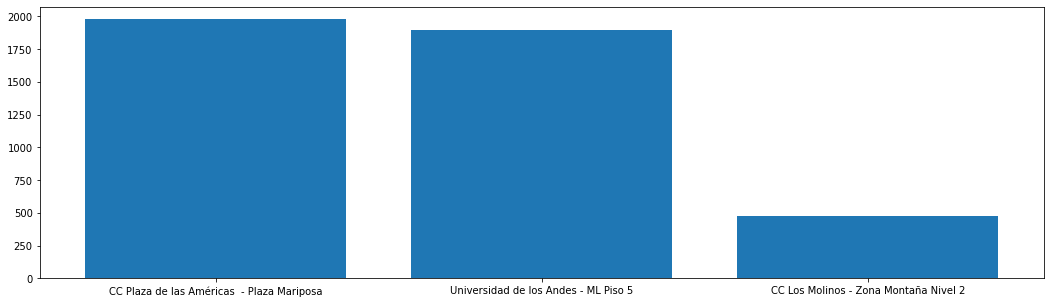

In [ ]:
plt.figure(figsize=(18,5))
plt.bar(pd.unique(df['maplocation_name']), total)
plt.show()

Identificamos donde más utilizan el punto COINK es en CC plaza de las americas y ahora en base a la cantidad de dinero que depositan decidí hallar los outliers del dinero que depositan

In [ ]:
df['operation_date'] = pd.to_datetime(df['operation_date'])

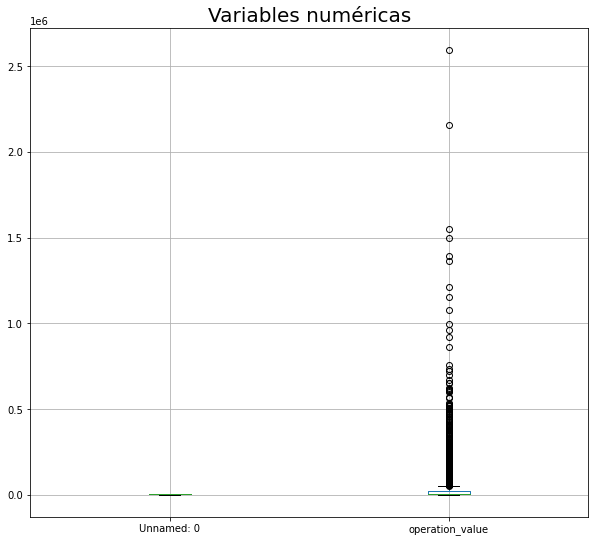

In [ ]:
plt.figure(figsize=(10,9))
df.boxplot()
plt.title("Variables numéricas", fontsize=20)
plt.show()

Entonces decidí obtener los registros de los usuarios que depositan más de 100000 pesos, que pensaría que son los clientes con más confiabilidad dan a la empresa y son aquellos que se deberían ofrecerles ofertas, descuentos y demás beneficios que haya en la empresa.

In [ ]:
NewDf =df[df['operation_value'] > 10000]
NewDf

,Unnamed: 0,user_id,operation_value,operation_date,maplocation_name,user_createddate
0,0,0e52d550-ae23-407a-9b1f-6e5fb1f066ab,273850.0,2022-01-14 13:07:56,CC Plaza de las Américas - Plaza Mariposa,2022-01-09 19:23:18.332689
4,4,171db06e-2e4b-4542-a9c9-32028520fda4,150000.0,2022-01-25 12:00:18,CC Plaza de las Américas - Plaza Mariposa,2022-01-11 15:59:27.651994
6,6,9fe4047c-e718-4da6-8fd5-080f46fc2e2f,142200.0,2022-02-14 13:47:58,CC Plaza de las Américas - Plaza Mariposa,2022-01-30 16:54:03.447831
7,7,8390c931-02f8-4a59-924b-5299306af556,10600.0,2021-12-26 14:01:37,CC Los Molinos - Zona Montaña Nivel 2,2021-12-08 18:39:34.167058
10,10,e7bff5a9-14d0-4e58-ac7a-d798507776ce,10750.0,2022-02-18 16:24:19,CC Los Molinos - Zona Montaña Nivel 2,2021-12-10 13:40:04.723180
...,...,...,...,...,...,...
4336,4336,3555ffe2-f10a-45c4-ab1b-fbe5332a0f67,29500.0,2022-01-02 13:37:37,CC Los Molinos - Zona Montaña Nivel 2,2021-12-31 14:23:46.560878
4337,4337,0a26f835-431a-423b-b00f-4b9343200346,13700.0,2021-12-30 17:51:11,CC Los Molinos - Zona Montaña Nivel 2,2021-12-19 12:22:29.366139
4338,4338,40680ece-2aa7-474a-99b4-c5d9087ff660,12100.0,2022-01-28 20:18:16,CC Los Molinos - Zona Montaña Nivel 2,2021-01-21 16:52:55.005197
4339,4339,f744b931-6232-43f6-bb7b-bd52275c3ddc,17200.0,2022-02-16 08:40:39,Universidad de los Andes - ML Piso 5,2020-01-16 11:26:00.603534


ese es 1 analisis que podriamos visualizar en la base de datos, como segundo analisis decidi visualizar que punto y que año habian más registros entonces genere un nuevo dataframe con las columnas que nos interesan graficar

In [ ]:
num_cols = ['operation_value', 'operation_date','maplocation_name']
NewDf[num_cols]

,operation_value,operation_date,maplocation_name
0,273850.0,2022-01-14 13:07:56,CC Plaza de las Américas - Plaza Mariposa
4,150000.0,2022-01-25 12:00:18,CC Plaza de las Américas - Plaza Mariposa
6,142200.0,2022-02-14 13:47:58,CC Plaza de las Américas - Plaza Mariposa
7,10600.0,2021-12-26 14:01:37,CC Los Molinos - Zona Montaña Nivel 2
10,10750.0,2022-02-18 16:24:19,CC Los Molinos - Zona Montaña Nivel 2
...,...,...,...
4336,29500.0,2022-01-02 13:37:37,CC Los Molinos - Zona Montaña Nivel 2
4337,13700.0,2021-12-30 17:51:11,CC Los Molinos - Zona Montaña Nivel 2
4338,12100.0,2022-01-28 20:18:16,CC Los Molinos - Zona Montaña Nivel 2
4339,17200.0,2022-02-16 08:40:39,Universidad de los Andes - ML Piso 5


Volvi la variable Operation_Date en una variable datatime para poder obtener el año de cada registro en la base de datos.

In [ ]:
NewDf[num_cols].dtypes

operation_value            float64
operation_date      datetime64[ns]
maplocation_name            object
dtype: object

In [ ]:
NewDf['operation_date'] = pd.to_datetime(NewDf['operation_date'], format='%Y-%m-%d %H:%M:%S')
NewDf['año'] = NewDf['operation_date'].dt.year
NewDf[['año','maplocation_name']]

<ipython-input-42-004265d6b115>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewDf['operation_date'] = pd.to_datetime(NewDf['operation_date'], format='%Y-%m-%d %H:%M:%S')
<ipython-input-42-004265d6b115>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewDf['año'] = NewDf['operation_date'].dt.year


,año,maplocation_name
0,2022,CC Plaza de las Américas - Plaza Mariposa
4,2022,CC Plaza de las Américas - Plaza Mariposa
6,2022,CC Plaza de las Américas - Plaza Mariposa
7,2021,CC Los Molinos - Zona Montaña Nivel 2
10,2022,CC Los Molinos - Zona Montaña Nivel 2
...,...,...
4336,2022,CC Los Molinos - Zona Montaña Nivel 2
4337,2021,CC Los Molinos - Zona Montaña Nivel 2
4338,2022,CC Los Molinos - Zona Montaña Nivel 2
4339,2022,Universidad de los Andes - ML Piso 5


Aqui generamos el conteo de cada registro que se tiene en que sitio y que año se realizo

In [ ]:
CC_losmolinos_2021 = NewDf[(NewDf["maplocation_name"] == "CC Los Molinos - Zona Montaña Nivel 2") & (NewDf["año"] == 2021)]
CC_losmolinos_2022 = NewDf[(NewDf["maplocation_name"] == "CC Los Molinos - Zona Montaña Nivel 2") & (NewDf["año"] == 2022)]
Universidad_andes_2021 = NewDf[(NewDf["maplocation_name"] == "Universidad de los Andes - ML Piso 5") & (NewDf["año"] == 2021)]
Universidad_andes_2022 = NewDf[(NewDf["maplocation_name"] == "Universidad de los Andes - ML Piso 5") & (NewDf["año"] == 2022)]
CC_plazaAmericas_2021 = NewDf[(NewDf["maplocation_name"] == "CC Plaza de las Américas  - Plaza Mariposa") & (NewDf["año"] == 2021)]
CC_plazaAmericas_2022 = NewDf[(NewDf["maplocation_name"] == "CC Plaza de las Américas  - Plaza Mariposa") & (NewDf["año"] == 2022)]


losmolinos_counts = [len(CC_losmolinos_2021), len(CC_losmolinos_2022)]
universidad_counts = [len(Universidad_andes_2021), len(Universidad_andes_2022)]
plazaAmericas_counts = [len(CC_plazaAmericas_2021), len(CC_plazaAmericas_2022)]

[313, 643]

In [ ]:
plt.figure(figsize=(18,5))
plt.bar(pd.unique(df['maplocation_name']), total)
plt.show()

Genere al grafica

In [ ]:
fig, ax = plt.subplots()
ax.bar([0, 1], losmolinos_counts, label="CC los molinos")
ax.bar([0, 1], universidad_counts, bottom=losmolinos_counts, label="Universidad de los andes")

ax.bar([0, 1], plazaAmericas_counts, bottom=[sum(x) for x in zip(losmolinos_counts, plazaAmericas_counts)], label="CC PLAZA DE LAS AMERICAS")

SyntaxError: ignored

Como punto final genere la visualizacion de cada punto y cada año. Observamos que en el 2022 se aumento la cantidad de veces que se utilizo el punto para generar sus ahorros con la empresa llevando casi un 100% del año 2021 al 2022 en  el punto de CC los molinos y Plaza de las americas.

<Figure size 1296x360 with 0 Axes>

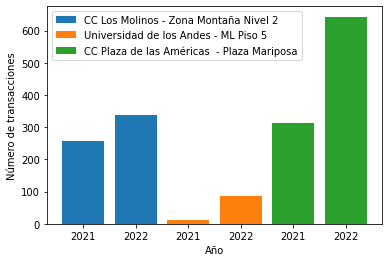

CC Los Molinos - Zona Montaña Nivel 2 [258, 337]
Universidad de los Andes - ML Piso 5 [12, 85]
CC Plaza de las Américas  - Plaza Mariposa [313, 643]


In [ ]:
plt.figure(figsize=(18,5))

fig, ax = plt.subplots()

ax.bar([0, 1], losmolinos_counts, label="CC Los Molinos - Zona Montaña Nivel 2")
ax.bar([2, 3], universidad_counts, label="Universidad de los Andes - ML Piso 5")
ax.bar([4, 5], plazaAmericas_counts, label="CC Plaza de las Américas  - Plaza Mariposa")
ax.set_xticks([0, 1, 2 , 3 , 4 ,5])
ax.set_xticklabels(["2021", "2022","2021", "2022","2021", "2022",])
ax.set_xlabel("Año")
ax.set_ylabel("Número de transacciones")
ax.legend()

# Mostrar el gráfico
plt.show()
print("CC Los Molinos - Zona Montaña Nivel 2",losmolinos_counts)
print("Universidad de los Andes - ML Piso 5", universidad_counts)
print("CC Plaza de las Américas  - Plaza Mariposa" ,plazaAmericas_counts)

Como conclusion llegue que hubo un incremento en todos los puntos a comparacion del 2021 a 2022 y que en el centro comercial plaza de las americas es donde más transacciones se hizo en ambos años.